# Areefin - Project 1

## TOP 3 Problems:

## Top 1 (Complex - WorldWideImporters)

### Proposition:

- Create an Inline-Valued Function called FindMyPackage where it will take @OrderID as the data paramter.  Display the following info: Order number, Product name, Product Description, what kind of package, Quantity ordered, Unit Price, Total Amount, Customer name, Customer phone number, Delivery method, use both Delivery address lines, Delivery city, Confirmed delivery date, confirmed delivery time, and delivery status using explicit cast date function.
- Tables involved: Sales.Orderlines, Warehouse.StockItems, Sales.Orders, Sales.Customers, Sales.Invoices, Warehouse.PackageTypes, and Application.DeliveryMethods

Standard View:  
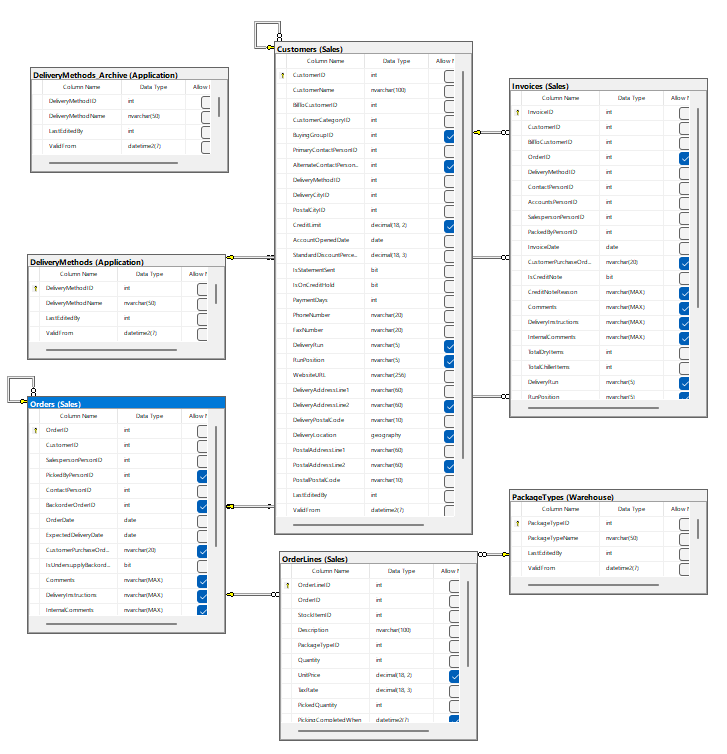

Key View:

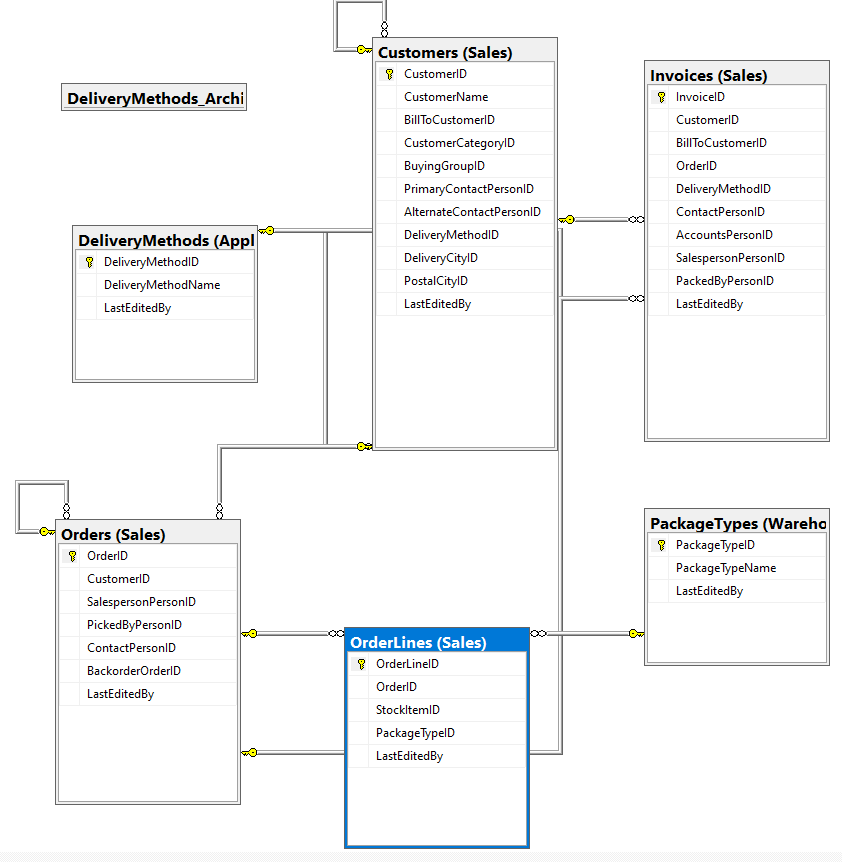

| Table                | Columns                                         |
|----------------------|-------------------------------------------------|
| Sales.OrderLines     | OrderID, StockItemID, Description, Quantity, UnitPrice, TaxRate, PackageTypeID |
| Warehouse.StockItems | StockItemID, StockItemName                      |
| Sales.Orders         | OrderID, CustomerID, ExpectedDeliveryDate       |
| Sales.Customers      | CustomerID, CustomerName, PhoneNumber           |
| Sales.Invoices       | OrderID, ConfirmedDeliveryTime, DeliveryMethodID|
| Warehouse.PackageTypes| PackageTypeID, PackageTypeName                  |
| Application.DeliveryMethods| DeliveryMethodID, DeliveryMethodName        |


In [ ]:
USE WorldWideImporters;

DROP FUNCTION IF EXISTS FindMyPackage;
GO

CREATE FUNCTION FindMyPackage(@OrderID AS INT)
RETURNS TABLE
AS
RETURN
(
    SELECT	A.OrderID,
			B.StockItemName,
			A.[Description],
			E.PackageTypeName,
			A.Quantity,
			A.UnitPrice,
			(A.UnitPrice * A.Quantity) + ((A.UnitPrice * A.Quantity) * A.TaxRate) AS TotalAmount,
			C.CustomerName,
			C.PhoneNumber,
			F.DeliveryMethodName,
			C.DeliveryAddressLine1,
			C.DeliveryAddressLine2,
			C.DeliveryCityID,
        CONVERT(DATE, D.ConfirmedDeliveryTime) AS ConfirmedDeliveryDate,
        RIGHT('0' + CONVERT(VARCHAR(2), DATEPART(HOUR, D.ConfirmedDeliveryTime)), 2) + ':' +
            RIGHT('0' + CONVERT(VARCHAR(2), DATEPART(MINUTE, D.ConfirmedDeliveryTime)), 2) AS ConfirmedDeliveryTime,
        CASE 
            WHEN CAST(Z.ExpectedDeliveryDate AS DATE) = CAST(D.ConfirmedDeliveryTime AS DATE) THEN 'Same Day Delivery'
            WHEN D.ConfirmedDeliveryTime > Z.ExpectedDeliveryDate THEN 'Delayed Delivery'
            ELSE 'On Time'
        END AS DeliveryStatus
    FROM Sales.OrderLines AS A
		INNER JOIN Warehouse.StockItems AS B  ON A.StockItemID = B.StockItemID
		INNER JOIN Sales.Orders AS Z ON A.OrderID = Z.OrderID
		INNER JOIN Sales.Customers AS C ON Z.CustomerID = C.CustomerID
		INNER JOIN Sales.Invoices AS D ON A.OrderID = D.OrderID
		INNER JOIN Warehouse.PackageTypes AS E ON A.PackageTypeID = E.PackageTypeID
		INNER JOIN [Application].[DeliveryMethods] AS F ON D.DeliveryMethodID = F.DeliveryMethodID
    WHERE A.OrderID = @OrderID
);
GO

SELECT *
FROM FindMyPackage(4)
FOR JSON PATH, ROOT('top 1');

## Top 2 (Complex - AdventureWorksDW2017)

Proposition: 

- Create a function based on customer input productkey or productsubcategorykey or productcategorykey. Return all the respective translated product names and their product descriptions.
- Tables involved: DimProduct, DimProductSubcategory, DimProductCategory.

Standard View:

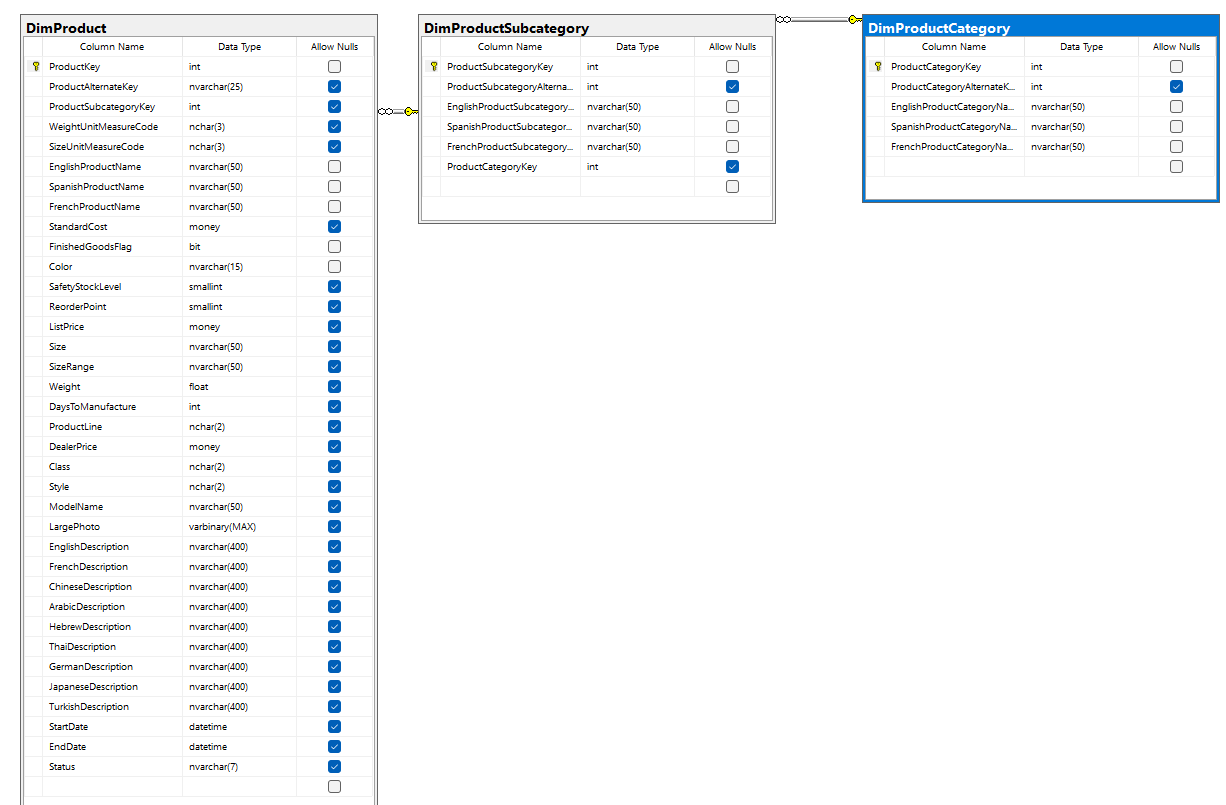

Key View:

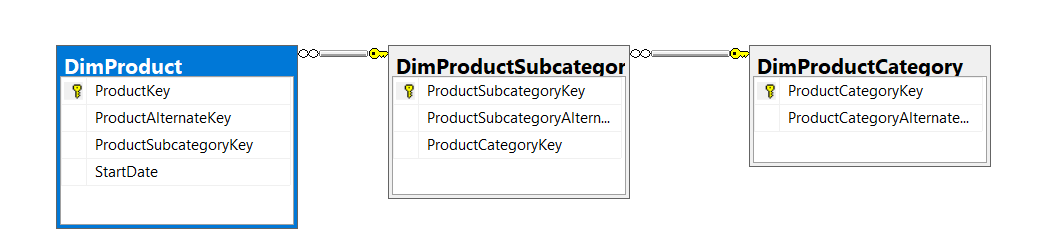

| Table | Columns |
| --- | --- |
| DimProduct | ProductKey, EnglishProductName, SpanishProductName, FrenchProductName, EnglishDescription, FrenchDescription, ChineseDescription, ArabicDescription, HebrewDescription, ThaiDescription, GermanDescription, JapaneseDescription, TurkishDescription, ProductSubcategoryKey |
| DimProductSubcategory | ProductSubcategoryKey, ProductCategoryKey, EnglishProductSubcategoryName, SpanishProductSubcategoryName, FrenchProductSubcategoryName |
| DimProductCategory | ProductCategoryKey, EnglishProductCategoryName, SpanishProductCategoryName, FrenchProductCategoryName |

In [ ]:
USE AdventureWorksDW2017;

DROP FUNCTION IF EXISTS FindProductTranslation;
GO

CREATE FUNCTION FindProductTranslation(@ProductKey AS INT)
RETURNS TABLE
AS
RETURN
(
    SELECT  P.EnglishProductName,
            P.SpanishProductName,
            P.FrenchProductName, 
            P.EnglishDescription,
            P.FrenchDescription,
            P.ChineseDescription,
            P.ArabicDescription,
            P.HebrewDescription,
            P.ThaiDescription,
            P.GermanDescription,
            P.JapaneseDescription,
            P.TurkishDescription
    FROM DimProduct AS P
    JOIN DimProductSubcategory AS PS ON P.ProductSubcategoryKey = PS.ProductSubcategoryKey
    JOIN DimProductCategory AS PC ON PS.ProductCategoryKey = PC.ProductCategoryKey
    WHERE P.ProductKey = @ProductKey
);
GO

DROP FUNCTION IF EXISTS FindProductCategoryTranslation;
GO

CREATE FUNCTION FindProductCategoryTranslation(@ProductCategoryKey AS INT)
RETURNS TABLE
AS
RETURN
(
    SELECT  PC.EnglishProductCategoryName,
            PC.SpanishProductCategoryName,
            PC.FrenchProductCategoryName 			
    FROM DimProductCategory AS PC
    WHERE PC.ProductCategoryKey = @ProductCategoryKey
);
GO

DROP FUNCTION IF EXISTS FindProductSubcategoryTranslation;
GO

CREATE FUNCTION FindProductSubCategoryTranslation(@ProductSubcategoryKey AS INT)
RETURNS TABLE
AS
RETURN
(
    SELECT  PSC.EnglishProductSubcategoryName,
            PSC.SpanishProductSubcategoryName,
            PSC.FrenchProductSubcategoryName 			
    FROM DimProductSubcategory AS PSC
    WHERE PSC.ProductSubcategoryKey = @ProductSubcategoryKey
);
GO

SELECT *
FROM FindProductTranslation(212);

SELECT *
FROM FindProductCategoryTranslation(3);

SELECT *
FROM FindProductSubcategoryTranslation(2)

FOR JSON PATH, ROOT('top 2');

## Top 3 (Complex - AdventureWorks2017)

Proposition:

- Create three functions FindEmployeeAddress, FindEmployeeEmailAddress, and FindEmployeePhoneNumber such that BusinessEntityID is the variable that is being past in the parameters.
- For the Function FindEmployeeAddress, display AddressLine1, City, and Residential type. For the Function FindEmployeeEmailAddress, display Employee's email and password. Finally, for the Function FindEmployeePhoneNumber, display Employee's Phone number, and Phone number type (Work Phone? Home Phone?)
- Tables involved: Person.BusinessEntityAddress, Person.Address, Person.AddressType, Person.EmailAddress, Person.Password, Person.PersonPhone, and Person.PhoneNumberType.

Standard View:

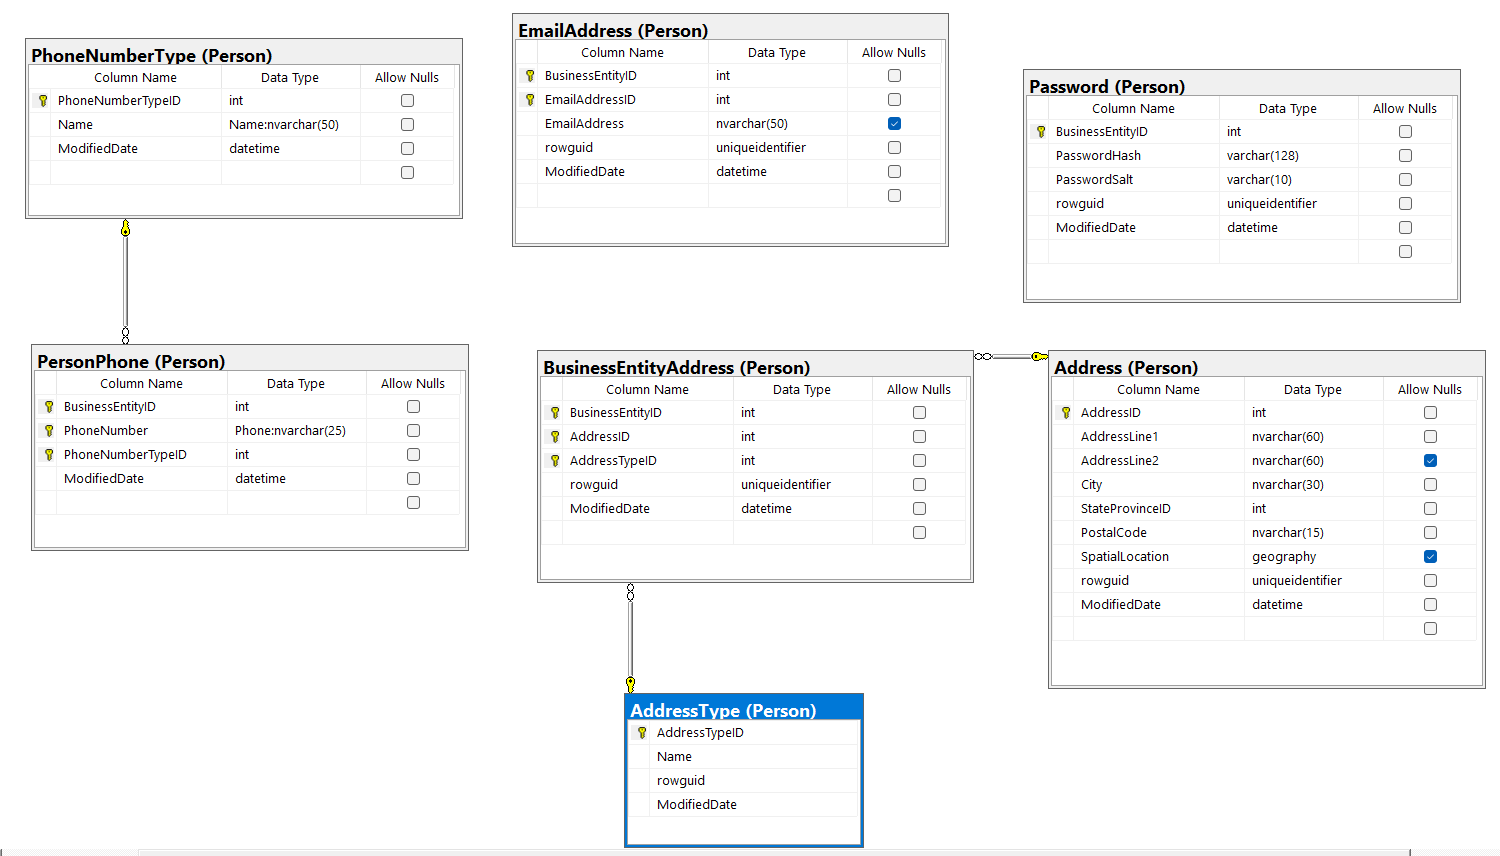  

Key View:

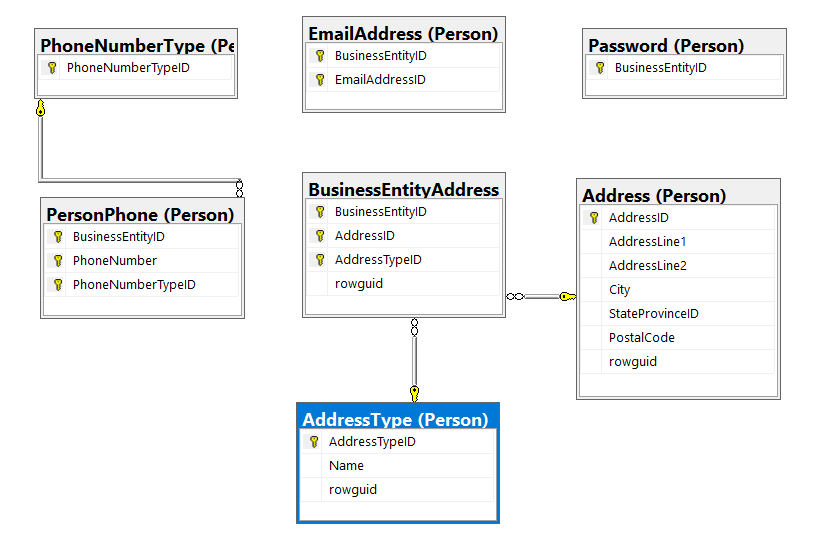  

| Table | Columns |
| --- | --- |
| Person.BusinessEntityAddress | BusinessEntityID, AddressID, AddressTypeID |
| Person.Address | AddressID, AddressLine1, City, StateProvinceID, PostalCode |
| Person.AddressType | AddressTypeID, Name |
| Person.EmailAddress | EmailAddress, BusinessEntityID |
| Person.Password | BusinessEntityID, PasswordHash |
| Person.PersonPhone | BusinessEntityID, PhoneNumber, PhoneNumberTypeID |
| Person.PhoneNumberType | PhoneNumberTypeID, Name |

In [ ]:
USE AdventureWorks2017;

DROP FUNCTION IF EXISTS FindEmployeeAddress;
GO

CREATE FUNCTION FindEmployeeAddress(@BusinessEntityID AS INT)
RETURNS TABLE
AS
RETURN
(
    SELECT  B.AddressLine1,
            B.City,
            C.NAME AS ResidentialType
    FROM Person.BusinessEntityAddress AS A 
        INNER JOIN Person.[Address] AS B ON A.AddressID = B.AddressID
        INNER JOIN Person.AddressType AS C ON A.AddressTypeID = C.AddressTypeID
    WHERE A.BusinessEntityID = @BusinessEntityID
);
GO

DROP FUNCTION IF EXISTS FindEmployeeEmailAddress;
GO

CREATE FUNCTION FindEmployeeEmailAddress(@BusinessEntityID AS INT)
RETURNS TABLE
AS
RETURN
(
    SELECT  A.EmailAddress,
            B.PasswordHash
    FROM Person.EmailAddress AS A
        INNER JOIN Person.[Password] AS B
            ON A.BusinessEntityID = B.BusinessEntityID
	WHERE A.BusinessEntityID = @BusinessEntityID
);
GO

DROP FUNCTION IF EXISTS FindEmployeePhoneNumber;
GO

CREATE FUNCTION FindEmployeePhoneNumber(@BusinessEntityID AS INT)
RETURNS TABLE
AS
RETURN
(
	SELECT	A.PhoneNumber,
			B.Name AS PhoneType
	FROM Person.PersonPhone AS A
		INNER JOIN Person.PhoneNumberType AS B
			ON A.PhoneNumberTypeID = B.PhoneNumberTypeID
	WHERE A.BusinessEntityID = @BusinessEntityID
);
GO

SELECT *
FROM FindEmployeeEmailAddress(2);

SELECT *
FROM FindEmployeeAddress(2);

SELECT *
FROM FindEmployeePhoneNumber(2)


FOR JSON PATH, ROOT('top 3');


## Worst 3 Problems:

Prioritize their 3 worst problems (medium, and complex); explain why they chose these problems for their lowest rating. How can the problems be fixed to make them better?

## Worst 1 (Medium - TSQLV4)

Proposition:

- Calculate Total sales revenue per year every year.
- Tables involved: Sales.Orders and Sales.OrderDetails

Standard View:

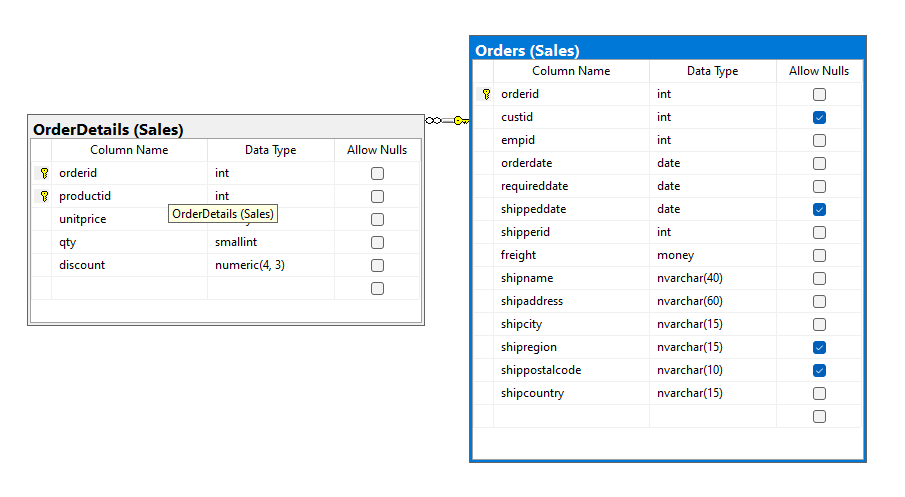  

Key View:

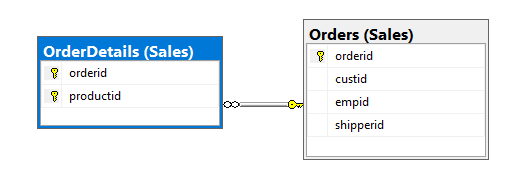  

  

| Table | Columns |
| --- | --- |
| Sales.Orders | orderid, orderdate |
| Sales.OrderDetails | <span style="background-color: rgb(37, 37, 38);">orderid, qty, unitprice</span><br> |

In [ ]:
USE TSQLV4;

SELECT	YEAR(O.orderdate) AS OrderYear,
		SUM(OD.qty * OD.unitprice) AS TotalSalesRevenue
FROM Sales.[Orders] AS O
	INNER JOIN Sales.[OrderDetails] AS OD
		ON O.orderid = OD.orderid
GROUP BY YEAR(O.orderdate)
ORDER BY OrderYear;

---------------------------------------------------------------
-- Fixed
---------------------------------------------------------------

USE TSQLV4;

SELECT 
    YEAR(O.orderdate) AS OrderYear,
    SUM(OD.qty * OD.unitprice) AS TotalSalesRevenue,
    SUM(SUM(OD.qty * OD.unitprice)) OVER (ORDER BY YEAR(O.orderdate)) AS RunningTotalSales
FROM 
    Sales.[Orders] AS O
INNER JOIN 
    Sales.[OrderDetails] AS OD ON O.orderid = OD.orderid
GROUP BY 
    YEAR(O.orderdate)
ORDER BY 
    OrderYear

FOR JSON PATH, ROOT('worse 1');

## Worst 2 (Medium - Northwinds2022TSQLV7)

Proposition:

- Find all the customer's ID, Name, Job title, Address, City, Country, and OrderId for those who have not placed any orders.
- Tables involved: Sales.Customer and Sales.Order

Standard View:  
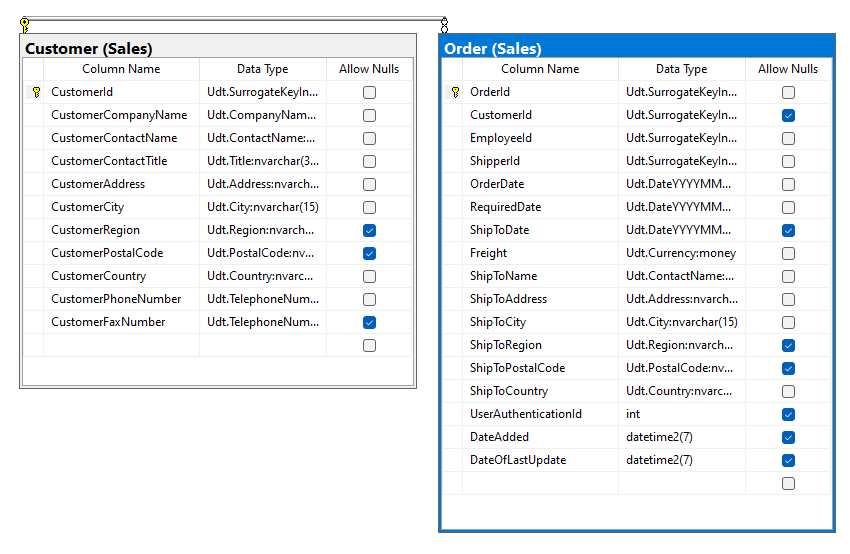  

Key View:

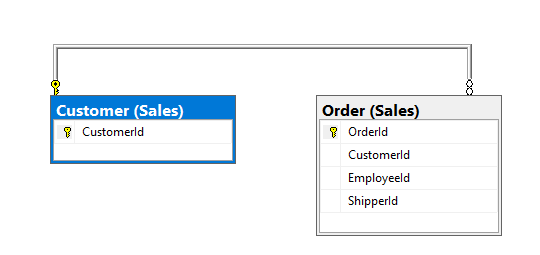  

| Table | Columns |
| --- | --- |
| Sales.Customer | <span style="color: rgb(236, 236, 236); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 14px; white-space-collapse: preserve; background-color: rgb(33, 33, 33);">CustomerId, CustomerContactName, CustomerContactTitle, CustomerAddress, CustomerCity, CustomerCountry</span><br> |
| <span style="color: rgb(236, 236, 236); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 14px; white-space-collapse: preserve;">Sales.Order</span><br> | <span style="color: rgb(236, 236, 236); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 14px; white-space-collapse: preserve;">OrderId, CustomerId</span><br> |

In [ ]:
USE Northwinds2022TSQLV7;

SELECT A.CustomerId,
		A.CustomerContactName,
		A.CustomerContactTitle, 
		A.CustomerAddress, 
		A.CustomerCity,
		A.CustomerCountry,
		B.OrderId
FROM Sales.[Customer] AS A
	LEFT OUTER JOIN Sales.[Order] AS B
		ON A.CustomerId = B.CustomerId
WHERE OrderId IS NULL;

---------------------------------------------------------------
-- Fixed
---------------------------------------------------------------

USE Northwinds2022TSQLV7;

SELECT	A.CustomerId,
		A.CustomerContactName,
		A.CustomerContactTitle, 
		A.CustomerAddress, 
		A.CustomerCity,
		A.CustomerCountry,
		B.OrderId,
    CASE WHEN B.OrderId IS NULL THEN 'No' ELSE 'Yes' END AS HasPlacedOrder,
    MAX(B.OrderDate) AS LastOrderDate,
    SUM(OD.UnitPrice * OD.Quantity) AS TotalOrderAmount
FROM Sales.[Customer] AS A
	LEFT JOIN Sales.[Order] AS B ON A.CustomerId = B.CustomerId
	LEFT JOIN Sales.OrderDetail AS OD ON B.OrderId = OD.OrderId
GROUP BY 
    A.CustomerId,
    A.CustomerContactName,
    A.CustomerContactTitle, 
    A.CustomerAddress, 
    A.CustomerCity,
    A.CustomerCountry,
    B.OrderId

	FOR JSON PATH, ROOT('worse 2');

## Worst 3 (Medium - Northwinds2022TSQLV7)

Proposition:

- Write a query that shows Customer's Country, Total number of Customers per country, Total revenue generated per country, and Average revenue per order per country.
- Tables involved: Sales.Customer, Sales.OrderDetail, and Sales.Order

Standard View:  
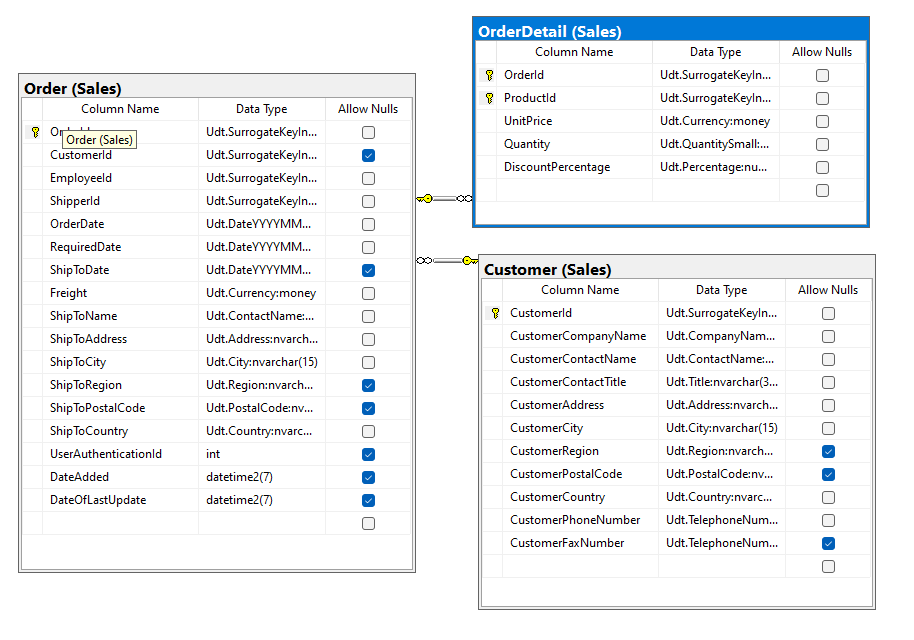

Key View:

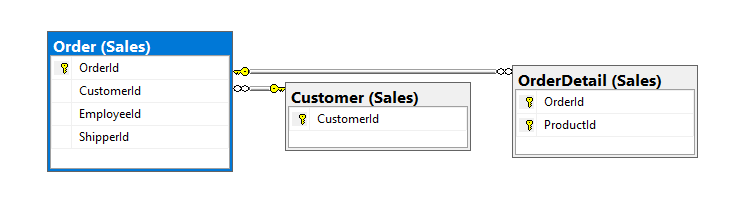

  

| Table | Columns |
| --- | --- |
| Sales.Customer | CustomerId, CustomerCountry<br> |
| Sales.Order | CustomerId, OrderId<br> |
| Sales.OrderDetail | OrderId, UnitPrice, Quantity<br> |

In [ ]:
USE Northwinds2022TSQLV7;

SELECT	C.CustomerCountry,
		COUNT(DISTINCT O.CustomerId) AS NumberOfCustomers,
		SUM(OD.UnitPrice * OD.Quantity) AS TotalRevenue,
		ROUND(AVG(OD.UnitPrice * OD.Quantity), 2) AS AverageRevenuePerOrder
FROM Sales.[Order] AS O
	INNER JOIN Sales.[OrderDetail] AS OD ON O.OrderId = OD.OrderId
	INNER JOIN Sales.Customer AS C ON O.CustomerId = C.CustomerId
GROUP BY C.CustomerCountry
ORDER BY TotalRevenue DESC;

---------------------------------------------------------------
-- Fixed
---------------------------------------------------------------

USE Northwinds2022TSQLV7;

WITH CountryRevenue AS (
    SELECT
        C.CustomerCountry,
        COUNT(DISTINCT O.CustomerId) AS NumberOfCustomers,
        SUM(OD.UnitPrice * OD.Quantity) AS TotalRevenue,
        ROUND(AVG(OD.UnitPrice * OD.Quantity), 2) AS AverageRevenuePerOrder,
        SUM(OD.UnitPrice * OD.Quantity) / SUM(SUM(OD.UnitPrice * OD.Quantity)) OVER () * 100 AS RevenueContributionPercentage
    FROM 
        Sales.[Order] AS O
    INNER JOIN 
        Sales.[OrderDetail] AS OD ON O.OrderId = OD.OrderId
    INNER JOIN 
        Sales.Customer AS C ON O.CustomerId = C.CustomerId
    GROUP BY 
        C.CustomerCountry
)
SELECT 
    *,
    CONCAT(RevenueContributionPercentage, '%') AS RevenueContributionPercentageFormatted
FROM 
    CountryRevenue
ORDER BY 
    TotalRevenue DESC

FOR JSON PATH, ROOT('worse 3');

## Q7 (Medium - AdventureWorksDW2017)

Proposition:

- Create a query that displays top 10 all time customers based on their lifetime total spending and research into their full name, age, marital status, gender, email address, yearly income, total amount of children they have, total amount of children at home, if they are a homeowner, number of cars owned, their address and of course, order by their lifetime total spending.
- Tables involved: DimCustomer and FactInternetSales

Standard View:

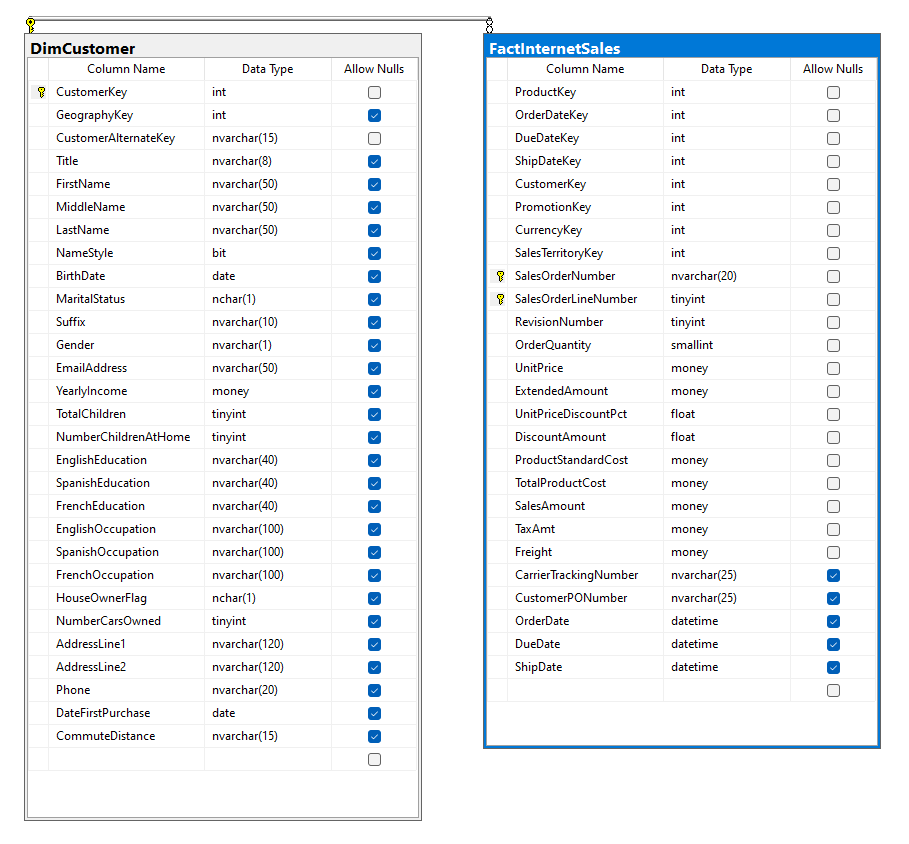  

Key View:

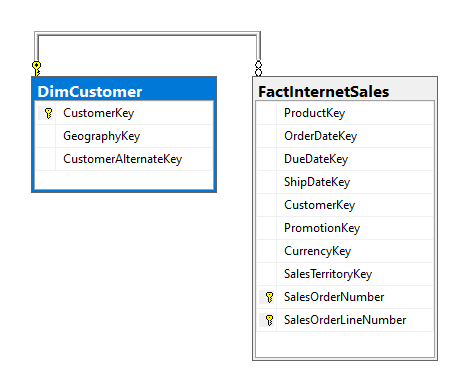  

| Table               | Columns                                         |
|---------------------|-------------------------------------------------|
| DimCustomer         | CustomerKey, FirstName, LastName, BirthDate, MaritalStatus, Gender, EmailAddress, AddressLine1, Phone, EnglishEducation, EnglishOccupation, YearlyIncome, TotalChildren, NumberChildrenAtHome, HouseOwnerFlag, NumberCarsOwned |
| FactInternetSales   | CustomerKey, OrderQuantity, UnitPrice           |


In [ ]:
USE AdventureWorksDW2017;

SELECT TOP(10) CONCAT(A.FirstName, ' ', A.LastName) AS [Full Name],
		DATEDIFF(YEAR, A.BirthDate, SYSDATETIME()) AS Age,
		A.MaritalStatus, 
		A.Gender, 
		A.EmailAddress,
		A.AddressLine1,
		A.Phone,
		A.EnglishEducation,
		A.EnglishOccupation,
		A.YearlyIncome, 
		A.TotalChildren, 
		A.NumberChildrenAtHome, 
		A.HouseOwnerFlag, 
		A.NumberCarsOwned,
		SUM(B.UnitPrice * B.OrderQuantity) AS BigSpenders
FROM DimCustomer AS A
	INNER JOIN FactInternetSales AS B
		ON A.CustomerKey = B.CustomerKey
GROUP BY A.FirstName, A.LastName, A.BirthDate, A.MaritalStatus, A.Gender, A.EmailAddress, A.AddressLine1, A.Phone, A.EnglishEducation, A.EnglishOccupation,A.YearlyIncome, 
		A.TotalChildren, A.NumberChildrenAtHome, A.HouseOwnerFlag, A.NumberCarsOwned
ORDER BY SUM(B.UnitPrice * B.OrderQuantity) DESC

FOR JSON PATH, ROOT('Project 1');

## Q8 (Complex - WorldWideImporters)

Proposition:

- Write a query that shows the top performing employees. Create a CTE expression called SameCustomerRevisits that contains employee ID, full name, Number of Orders completed, Total revenue earned by employee, total amount of unique customers helped and display the total amount of revisits by same customer to the same employee all ordered by Number of Orders completed in descending order.
- Tables involved: Sales.Orders, Sales.OrderLines, Application.People, and your CTE expression aliased SameCustomerRevisits.

Standard View:

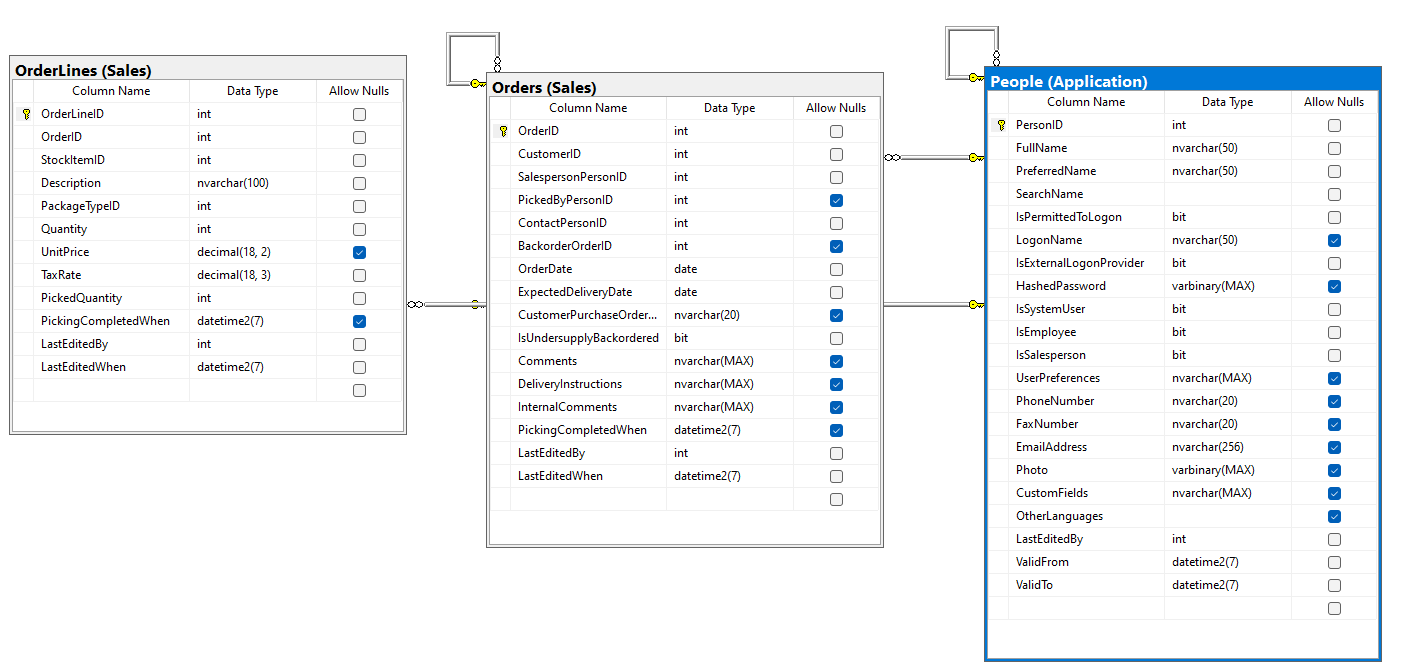  

Key View:

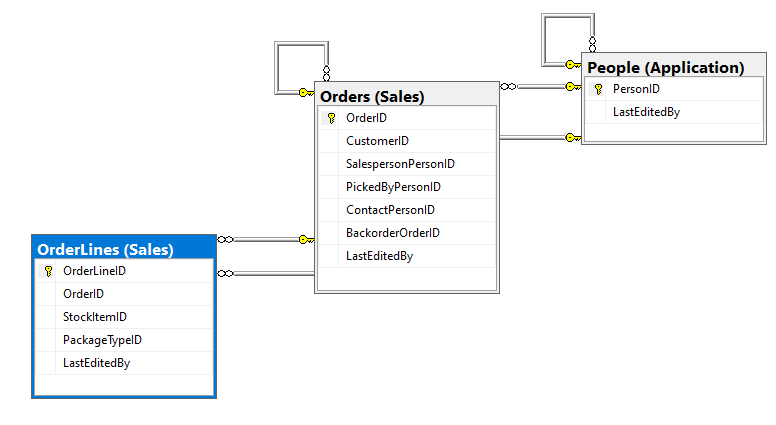  

| Table | Columns |
| --- | --- |
| Sales.Orders | OrderID, CustomerID, SalespersonPersonID |
| Sales.OrderLines | OrderID, Quantity, UnitPrice |
| \[Application\].\[People\] | PersonID, FullName |

In [ ]:
USE WorldWideImporters;

WITH SameCustomerRevisits AS 
(
    SELECT	CustomerID,
			SalespersonPersonID AS EmployeeID,
			COUNT(DISTINCT OrderID) AS RevisitCount
    FROM	Sales.Orders
    GROUP BY CustomerID, SalespersonPersonID
    HAVING	COUNT(DISTINCT OrderID) > 1
)

SELECT	A.PersonID AS EmployeeID,
		A.FullName AS EmployeeFullName,
		COUNT(DISTINCT B.OrderID) AS NumberOfOrdersCompleted,
		SUM(C.Quantity * C.UnitPrice) AS TotalRevenueEarnedByEmployee,
		COUNT(DISTINCT B.CustomerID) AS TotalOfDistinctCustomersHelped,
		COALESCE(R.RevisitCount, 0) AS RevisitCount
FROM [Application].[People] AS A
	INNER JOIN Sales.Orders AS B ON A.PersonID = B.SalespersonPersonID
	INNER JOIN Sales.OrderLines AS C ON B.OrderID = C.OrderID
	LEFT JOIN SameCustomerRevisits AS R ON B.CustomerID = R.CustomerID AND B.SalespersonPersonID = R.EmployeeID
GROUP BY A.PersonID, A.FullName, R.RevisitCount
ORDER BY NumberOfOrdersCompleted DESC

FOR JSON PATH, ROOT('Project 1');

## Q9 (Medium - WorldWideImportersDW)

Proposition:

- Create a query that shows the top 100 stock items and their supplier information. Show the following columns: stock item name, unit price, recommended retail price, typical weight per unit, profit, who the supplier is, supplier category, primary contact, customer who bought it
- Tables involved: Fact.Purchase, Dimension.\[Stock Item\], Dimension.Supplier, Fact.Sale, and Dimension.Customer

Standard View:  
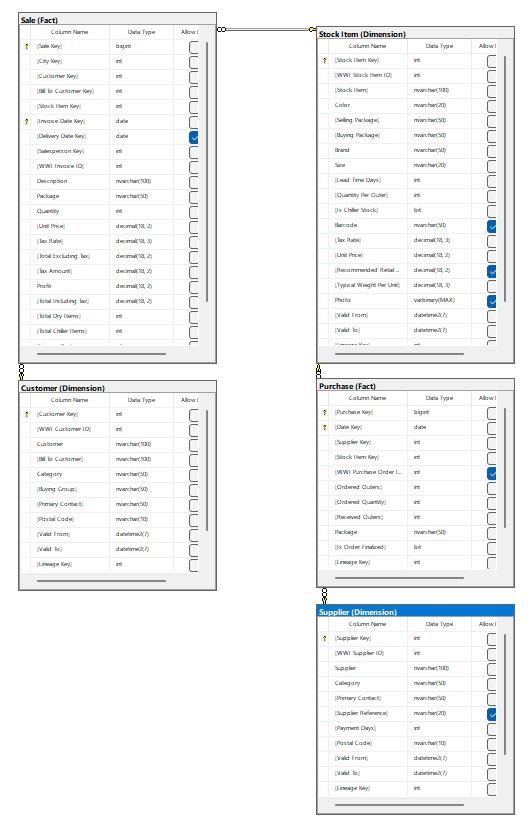  

Key View:

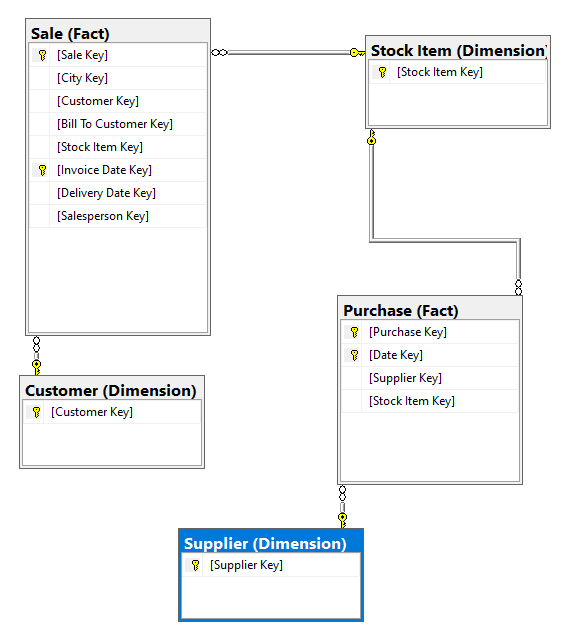  

| Table | Columns |
| --- | --- |
| Fact.Purchase | Stock Item Key, Supplier Key |
| Dimension.Stock Item | Stock Item, Unit Price, Recommended Retail Price, Typical Weight Per Unit |
| Dimension.Supplier | Supplier, Category, Primary Contact |
| Fact.Sale | Stock Item Key, Customer Key |
| Dimension.Customer | Customer |

In [ ]:
USE WorldWideImportersDW;

SELECT	TOP(100) A.[Stock Item],
		A.[Unit Price],
		A.[Recommended Retail Price],
		A.[Typical Weight Per Unit],
		(A.[Recommended Retail Price] - A.[Unit Price]) AS PROFIT,
		B.Supplier,
		B.Category,
		B.[Primary Contact],
		C.Customer
FROM Fact.Purchase AS FP
	JOIN Dimension.[Stock Item] AS A ON FP.[Stock Item Key] = A.[Stock Item Key]
	JOIN Dimension.Supplier AS B ON B.[Supplier Key] = FP.[Supplier Key]
	JOIN Fact.Sale AS FS ON FP.[Stock Item Key] = FS.[Stock Item Key]
	JOIN Dimension.Customer AS C ON FS.[Customer Key] = C.[Customer Key]

	FOR JSON PATH, ROOT('Project 1');

## Q10 (Complex - AdventureWorks2017)

Proposition:

- Show Employee workplace information. Create a CTE expression aliased YearsWorked where you will calculate how many years in total each employee have worked. If the employee is still currently in the work force then use the SYSDATETIME() function to calculate the current time. Display employees full name, job title, total amount of years worked, salary rate, department, department group name and their work shift (NOT IN shiftID).
- Tables involved: HumanResources.EmployeeDepartmentHistory, HumanResources.Employee, HumanResources.Department, HumanResources.EmployeePayHistory, HumanResources.Shift

Standard View:

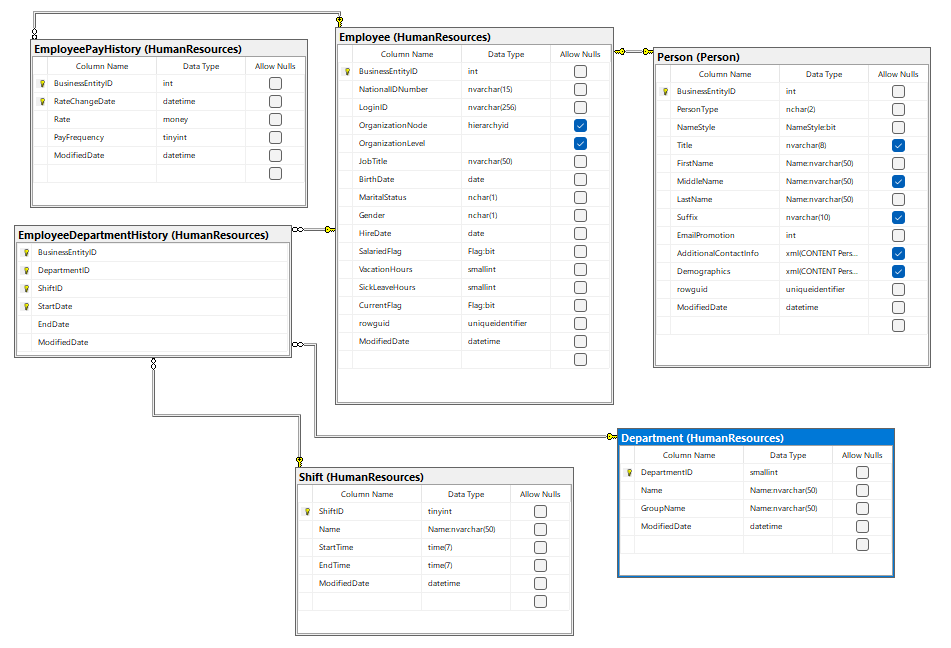  

Key View:

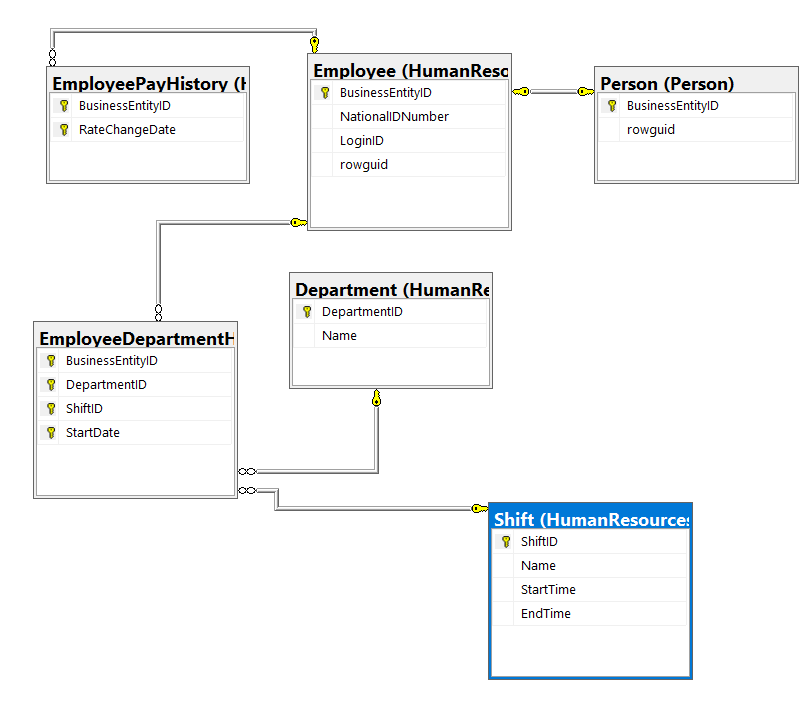  

| Table | Columns |
| --- | --- |
| Person.Person | BusinessEntityID, FirstName, LastName |
| HumanResources.Employee | BusinessEntityID, JobTitle |
| HumanResources.EmployeeDepartmentHistory | BusinessEntityID, DepartmentID, ShiftID, StartDate, EndDate |
| HumanResources.Department | DepartmentID, Name, GroupName |
| HumanResources.EmployeePayHistory | BusinessEntityID, Rate |
| HumanResources.\[Shift\] | ShiftID, Name |

In [ ]:
USE AdventureWorks2017;

WITH YearsWorked AS
(
    SELECT
        C.BusinessEntityID,
        SUM
		(
            CASE
                WHEN C.EndDate IS NOT NULL THEN DATEDIFF(YEAR, C.StartDate, C.EndDate)
                WHEN C.EndDate IS NULL THEN DATEDIFF(YEAR, C.StartDate, SYSDATETIME())
                ELSE 0  
            END
        ) AS TotalYearsWorked
    FROM HumanResources.EmployeeDepartmentHistory AS C
    GROUP BY C.BusinessEntityID
)

SELECT	CONCAT(A.FirstName, ' ', A.LastName) AS FullName,
		B.JobTitle,
		E.TotalYearsWorked,
		F.Rate AS SalaryRate,
		D.Name AS DepartmentName,
		D.GroupName AS DepartmentGroupName,
		G.Name AS WorkShift
FROM Person.Person AS A
    INNER JOIN HumanResources.Employee AS B ON A.BusinessEntityID = B.BusinessEntityID
    INNER JOIN HumanResources.EmployeeDepartmentHistory AS C ON A.BusinessEntityID = C.BusinessEntityID
    INNER JOIN HumanResources.Department AS D ON C.DepartmentID = D.DepartmentID
    INNER JOIN HumanResources.EmployeePayHistory AS F ON C.BusinessEntityID = F.BusinessEntityID
    INNER JOIN HumanResources.[Shift] AS G ON C.ShiftID = G.ShiftID
    LEFT JOIN YearsWorked AS E ON A.BusinessEntityID = E.BusinessEntityID  
GROUP BY	A.BusinessEntityID,  
			CONCAT(A.FirstName, ' ', A.LastName),
			B.JobTitle,
			E.TotalYearsWorked,
			F.Rate,
			D.Name,
			D.GroupName,
			G.Name
ORDER BY SalaryRate DESC

FOR JSON PATH, ROOT('Project 1');


## Q11 (Medium - AdventureWorksDW2017)

Proposition:

- Write a query that displays top most profitable products. Show the following columns: Product Key, Product name, their respective English, Spanish, and French translation, Product's profit, and total units sold.
- Tables involved: DimProduct and dbo.FactInternetSales.

Standard View:

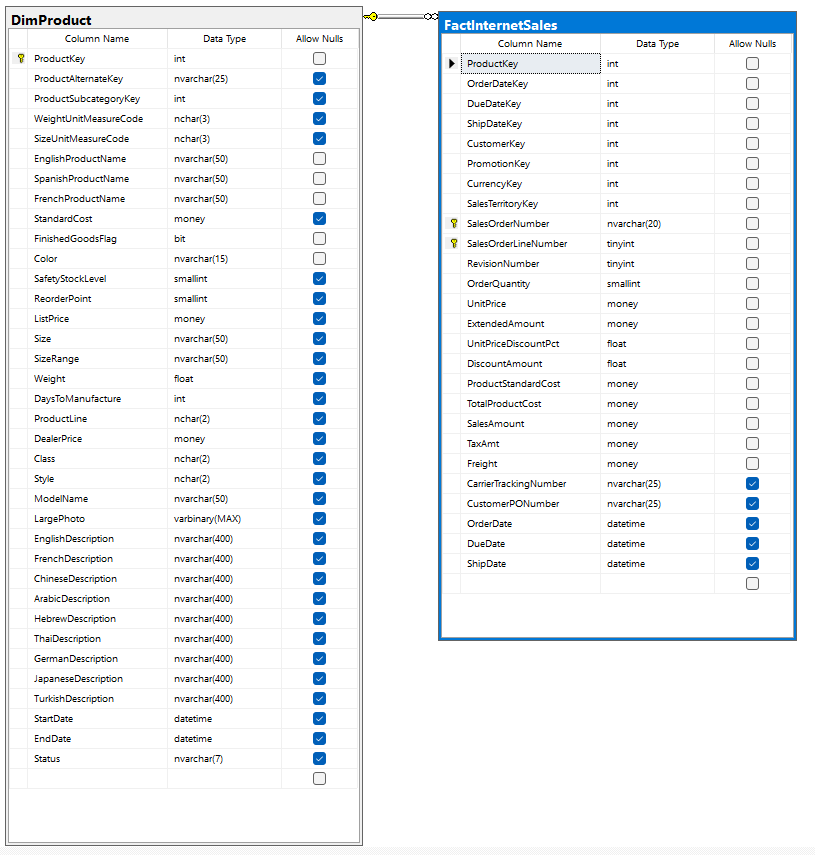  

Key View:

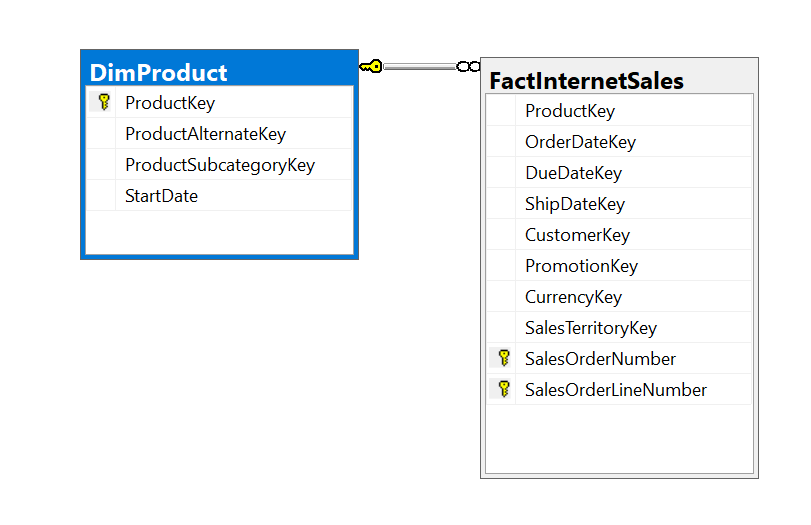  

| Table | Columns |
| --- | --- |
| DimProduct | ProductKey, EnglishProductName, SpanishProductName, FrenchProductName |
| dbo.FactInternetSales | ProductKey, UnitPrice, SalesAmount, TotalProductCost, OrderQuantity |

In [ ]:
USE AdventureWorksDW2017;

SELECT TOP(100)	A.ProductKey,
		A.EnglishProductName,
		A.SpanishProductName,
		A.FrenchProductName,
		MAX(B.UnitPrice) AS UnitPrice,
		ROUND(SUM(B.SalesAmount) - SUM(B.TotalProductCost), 2) AS ProductProfit,
		SUM(B.OrderQuantity) AS TotalUnitsSold,
		AVG(B.SalesAmount) AS AverageProductSalesAmount
FROM DimProduct AS A 
	INNER JOIN dbo.FactInternetSales AS B ON A.ProductKey = B.ProductKey
GROUP BY	A.ProductKey,
			A.EnglishProductName,
			A.SpanishProductName,
			A.FrenchProductName,
			B.UnitPrice
ORDER BY ProductProfit DESC

FOR JSON PATH, ROOT('Project 1');

## Q12 (Complex - AdventureWorks2017)

Proposition:

- Create a query for Customer credit card transaction history using a CTE expression aliased as FullCustomerCreditCardInfo. Within the CTE expression, use the following columns: Customers full name, CardType, CardNumber, Expiration month, Expiration year, latest/most recent transaction orderdate, credit card id, credit card approval code, and total view.
- Tables involved: Person.Person, Sales.PersonCreditCard, Sales.CreditCard, and Sales.SalesOrderHeader.

Standard View:

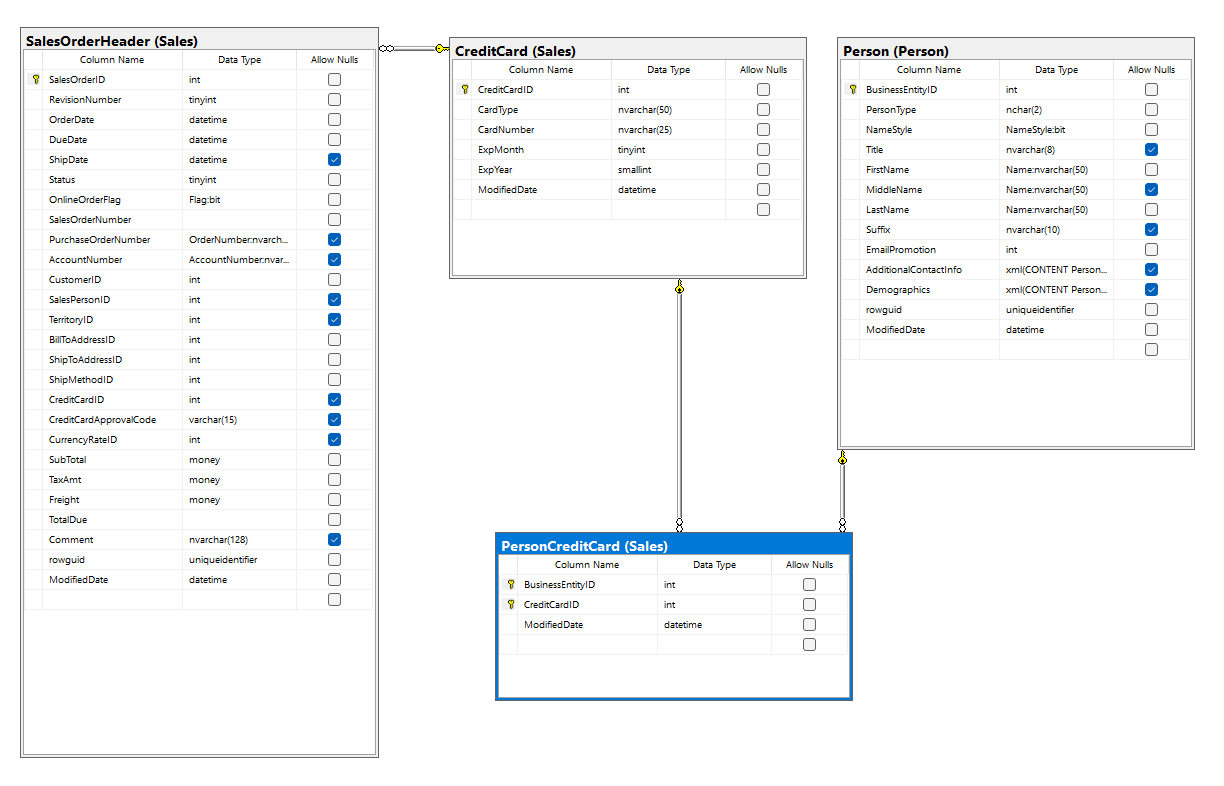  

Key View:

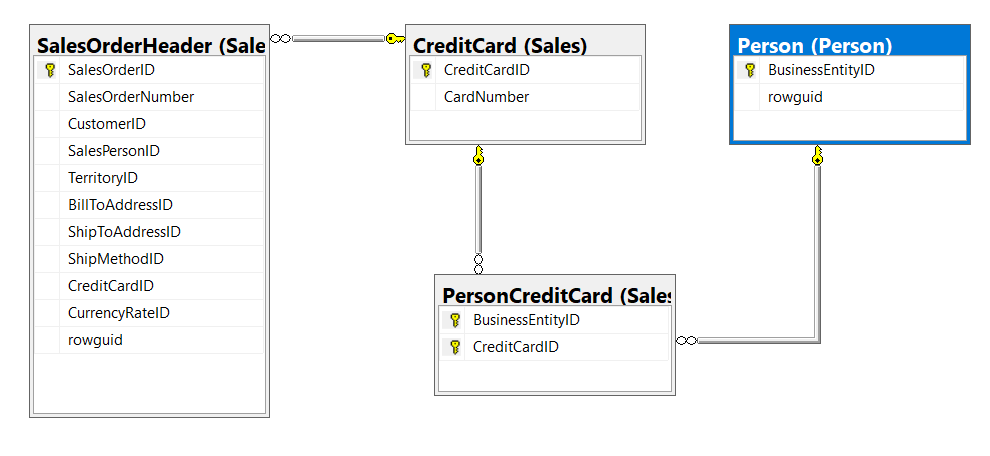  

| Table | Columns |
| --- | --- |
| Person.Person | BusinessEntityID, FirstName, LastName |
| Sales.PersonCreditCard | BusinessEntityID, CreditCardID |
| Sales.CreditCard | CreditCardID, CardType, CardNumber, ExpMonth, ExpYear |
| Sales.SalesOrderHeader | CreditCardID, OrderDate, CreditCardApprovalCode, TotalDue |

In [ ]:
USE AdventureWorks2017;

WITH FullCustomerCreditCardInfo AS
(
	
	
		SELECT	CONCAT(A.FirstName, ' ', A.LastName) AS FullName,
				B.CreditCardID,
				C.CardType,
				C.CardNumber, 
				C.ExpMonth, 
				C.ExpYear,
				MAX(D.OrderDate) AS RecentOrderDate,
				D.CreditCardApprovalCode,
				ROUND(D.TotalDue, 2) AS TotalDue
		FROM Person.Person AS A
			INNER JOIN Sales.PersonCreditCard AS B ON A.BusinessEntityID = B.BusinessEntityID
			INNER JOIN Sales.CreditCard AS C ON C.CreditCardID = B.CreditCardID
			INNER JOIN Sales.SalesOrderHeader AS D ON C.CreditCardID = D.CreditCardID
		GROUP BY 
				A.FirstName,
				A.LastName,
				B.CreditCardID,
				C.CardType,
				C.CardNumber, 
				C.ExpMonth, 
				C.ExpYear,
				D.CreditCardApprovalCode,
				ROUND(D.TotalDue, 2)
)

SELECT *
FROM FullCustomerCreditCardInfo

FOR JSON PATH, ROOT('Project 1');

## Q13 (Medium - WorldWideImporters)

Propostion:

- Write a query for customer's delivery transcript. Select the top 100 of customer's order containing customer ID, order ID, order date, expected delivery date, delivery instructions, confirmed delivery time, confirm who received by, how many days beteen the expected date and confirmed date, address, city, postal address and delivery method.
- Tables involved: Sales.Orders, Sales.Invoices, Sales.Customers, and Application.DeliveryMethods.

Standard View:

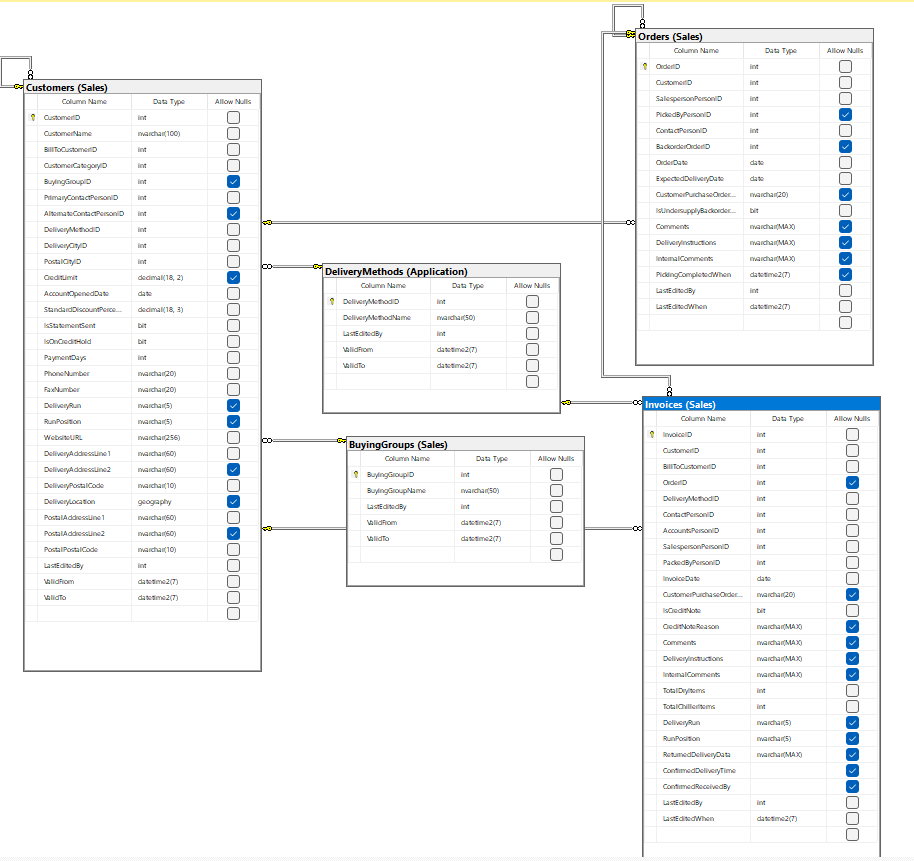  

Key View:

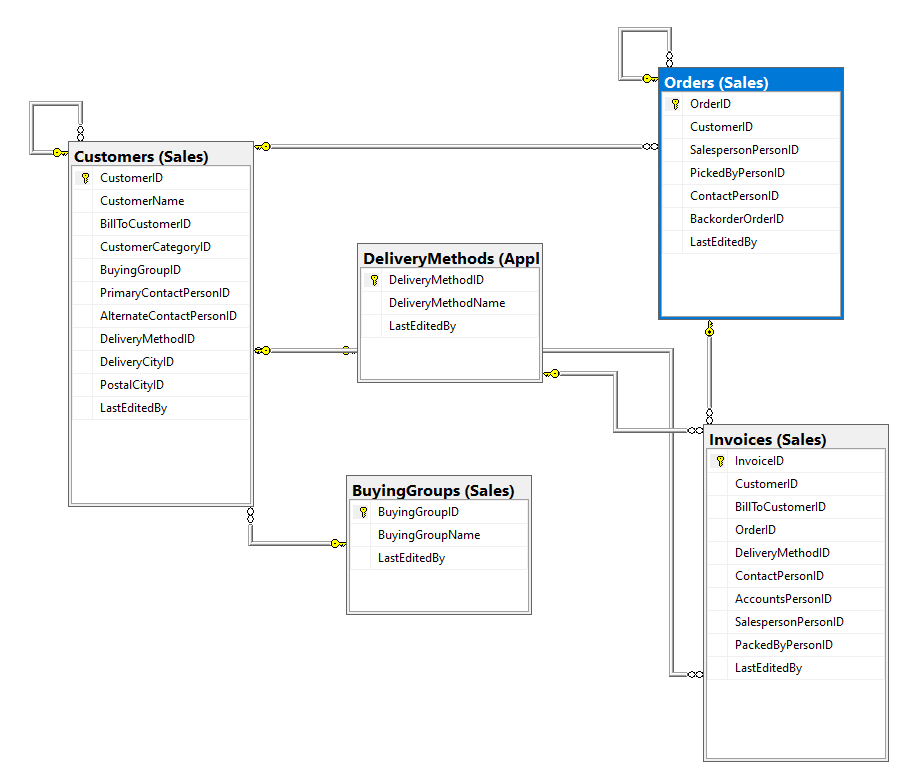  

| Table | Columns |
| --- | --- |
| Sales.Orders | CustomerID, OrderID, OrderDate, ExpectedDeliveryDate |
| Sales.Invoices | CustomerID, DeliveryInstructions, ConfirmedDeliveryTime, ConfirmedReceivedBy |
| Sales.Customers | CustomerID, DeliveryAddressLine1, DeliveryAddressLine2, DeliveryCityID, PostalAddressLine1 |
| Application.DeliveryMethods | DeliveryMethodID, DeliveryMethodName |

In [ ]:
USE WorldWideImporters;

SELECT TOP (100) A.CustomerID,
		A.OrderID,
		A.OrderDate, 
		A.ExpectedDeliveryDate,
		B.DeliveryInstructions, 
		B.ConfirmedDeliveryTime, 
		B.ConfirmedReceivedBy,
		DATEDIFF(DAY, B.ConfirmedDeliveryTime, A.ExpectedDeliveryDate) AS DaysBetweenExpectedAndConfirmedDate,
		C.DeliveryAddressLine1,
		C.DeliveryAddressLine2,
		C.DeliveryCityID,
		C.PostalAddressLine1,
		D.DeliveryMethodName
FROM Sales.Orders AS A
	INNER JOIN Sales.Invoices AS B ON A.CustomerID = B.CustomerID
	INNER JOIN Sales.Customers AS C ON B.CustomerID = C.CustomerID
	INNER JOIN Application.DeliveryMethods AS D ON B.DeliveryMethodID = D.DeliveryMethodID
GROUP BY A.CustomerID,
		 A.OrderID,
		 A.OrderDate, 
		 A.ExpectedDeliveryDate, 
		 B.DeliveryInstructions, 
		 B.ConfirmedDeliveryTime, 
		 B.ConfirmedReceivedBy, 
		 DATEDIFF(DAY, B.ConfirmedDeliveryTime, A.ExpectedDeliveryDate),
		 C.DeliveryAddressLine1,
		 C.DeliveryAddressLine2,
		 C.DeliveryCityID,
		 C.PostalAddressLine1,
		 D.DeliveryMethodName

FOR JSON PATH, ROOT('Project 1');


## Q14 (Medium - TSQLV4)

Proposition:

- Create a query that shows peak discount years and months. Display the following: Discount date, Discount year, Discount month, Month name, total number of unique customers per month during those discount sales, total number of items sold, total sales made and total discount, all per month and ordered by unique customers in descending order.
- Tables involved: Sales.Orders and Sales.OrderDetails.

Standard View:

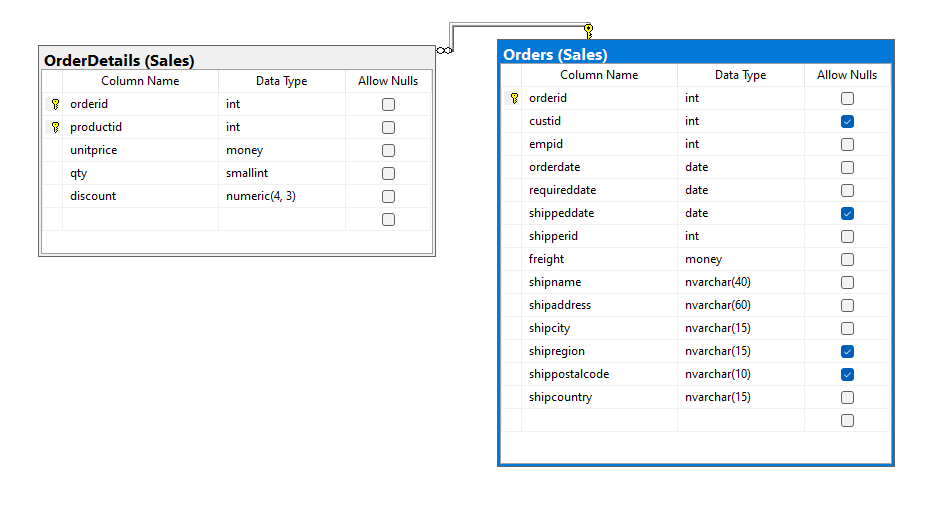  

Key View:  
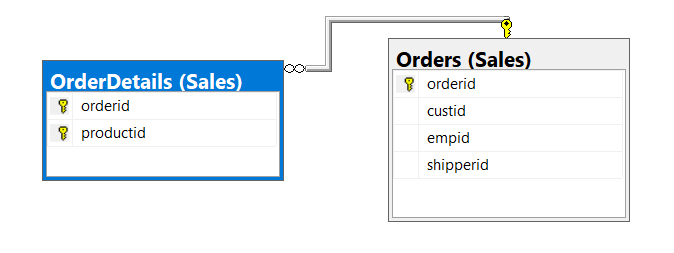  

| Table | Columns |
| --- | --- |
| Sales.Orders | OrderDate, Custid |
| Sales.OrderDetails | Orderid, Qty, UnitPrice, Discount |

In [ ]:
USE TSQLV4;

Select MIN(O.OrderDate) AS DiscountDate,
		DATEPART(YEAR, MIN(O.OrderDate)) AS DiscountYear,
		DATENAME(MONTH, MIN(O.OrderDate)) AS DiscountMonth,
		COUNT(DISTINCT O.Custid) AS DistinctCustomers,
		SUM(OD.qty) AS TotalItemsSold,
		SUM(OD.UnitPrice * OD.qty) AS TotalSales,
		SUM(OD.Discount) AS TotalDiscount
FROM Sales.[Orders] AS O
	INNER JOIN Sales.[OrderDetails] AS OD ON O.Orderid = OD.Orderid
WHERE OD.Discount > 0
GROUP BY DATEPART(YEAR, O.OrderDate),
		 DATEPART(MONTH, O.OrderDate)
ORDER BY DistinctCustomers DESC

FOR JSON PATH, ROOT('Project 1');

## Q15 (Medium - Northwinds2022TSQLV7)

Proposition:

- Implement a query that consists of monthly sales statistics. Include the following columns: Order year, Order month number and name associated with the number, total sales generated per month, average sales per month, total quantity sold per month, average quantity sold per month, and number of unique customers per month all order by order year and order month number.
- Tables involved: Sales.Order and Sales.OrderDetail.

Standard View:

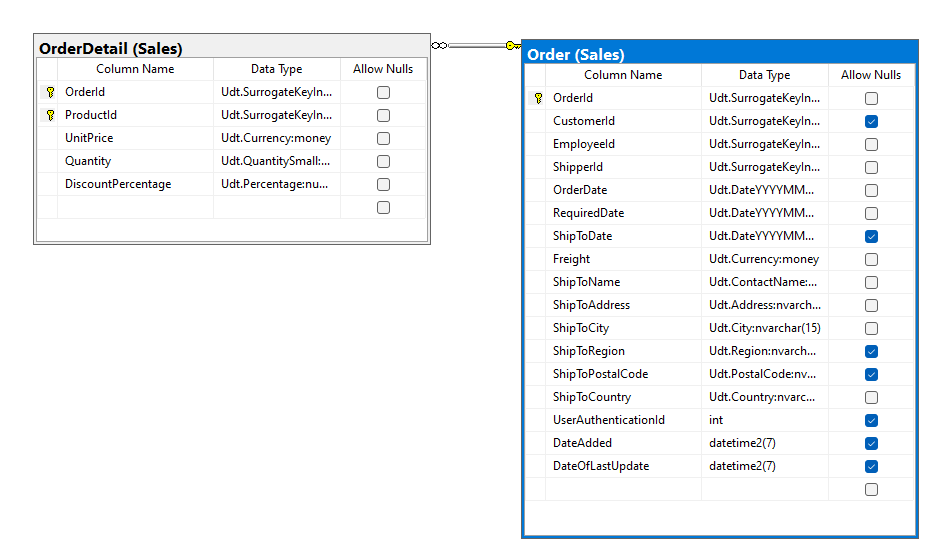  

Key View:

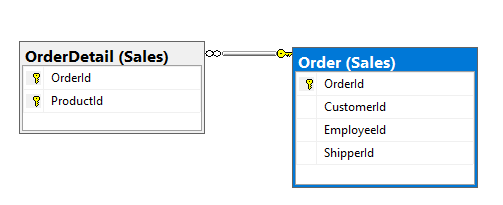  

| Table | Columns |
| --- | --- |
| Sales.\[Order\] | OrderId, OrderDate, CustomerId |
| Sales.\[OrderDetail\] | OrderId, UnitPrice, Quantity |

In [ ]:
USE Northwinds2022TSQLV7;

SELECT
    YEAR(A.OrderDate) AS OrderYear,
    MONTH(A.OrderDate) AS OrderMonthNumber,
    DATENAME(MONTH, A.OrderDate) AS OrderMonth,
    SUM(B.UnitPrice * B.Quantity) AS TotalSales,
	AVG(B.UnitPrice * B.Quantity) AS AverageSalesPerMonth,
	SUM(B.Quantity) AS TotalQuantitySoldPerMonth,
	AVG(B.Quantity) AS AverageQuantitySoldPerMonth,
	COUNT(DISTINCT A.CustomerId) AS UniqueCustomersPerMonth
FROM
    Sales.[Order] AS A
INNER JOIN
    Sales.[OrderDetail] AS B ON A.OrderId = B.OrderId
GROUP BY
    YEAR(A.OrderDate), MONTH(A.OrderDate), DATENAME(MONTH, A.OrderDate)
ORDER BY
    OrderYear, OrderMonthNumber

    FOR JSON PATH, ROOT('Project 1');